In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🔥 Heart Disease Data Preprocessing Started!")
print("="*60)

🔥 Heart Disease Data Preprocessing Started!


# ===============================
# 1. DATA LOADING
# ===============================

In [8]:
file_path = '../Data/heart_disease_dataset.csv'  
df = pd.read_csv(file_path)
print(f" Dataset loaded successfully!")
print(f" Dataset shape: {df.shape}")
print(f" Columns: {list(df.columns)}")

 Dataset loaded successfully!
 Dataset shape: (303, 14)
 Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


# ===============================
# 2. INITIAL EXPLORATION
# ===============================

In [10]:
print("\n🔍 STEP 2: Initial Data Exploration")
print("-" * 40)

print(" First 5 rows:")
print(df.head())

print("\n Statistical Summary:")
print(df.describe())

print("\n Data Types:")
print(df.dtypes)

print("\n Dataset Info:")
df.info()


🔍 STEP 2: Initial Data Exploration
----------------------------------------
 First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  

 Statistical Summary:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.

# ===============================
# 3. MISSING VALUES ANALYSIS
# ===============================

In [11]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing_values,
    'Missing_Percentage': missing_percentage
})

print("Missing Values Summary:")
print(missing_df[missing_df['Missing_Count'] > 0])

if missing_values.sum() == 0:
    print(" Great! No missing values found in the dataset!")
else:
    print(f" Found {missing_values.sum()} missing values in total")

Missing Values Summary:
     Column  Missing_Count  Missing_Percentage
ca       ca              4            1.320132
thal   thal              2            0.660066
 Found 6 missing values in total


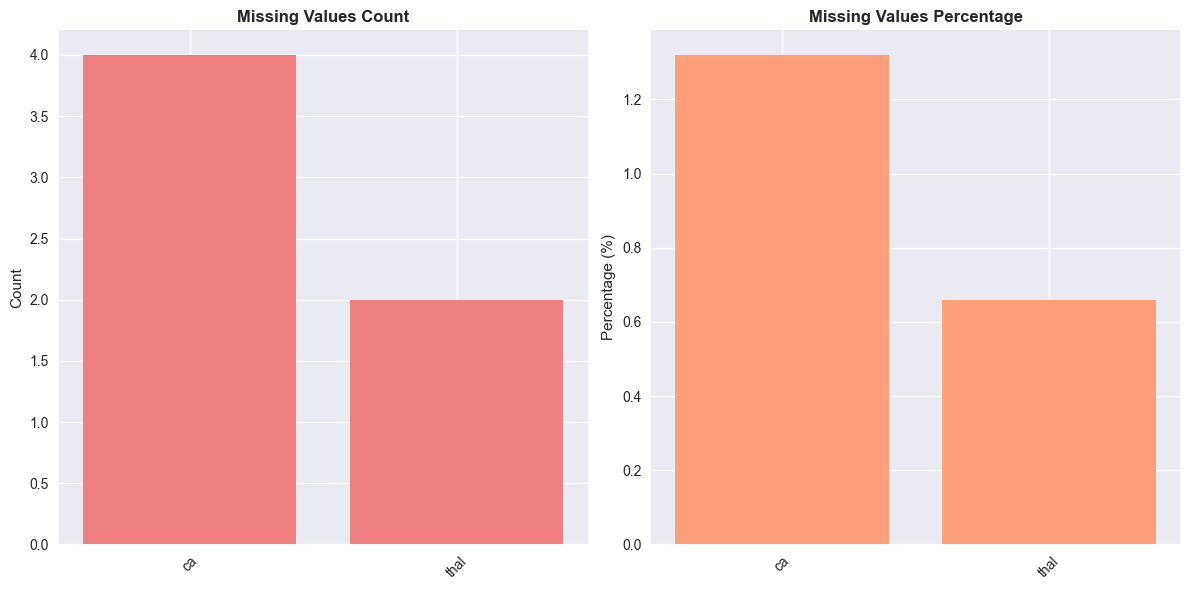

In [12]:
# Visualize missing values
plt.figure(figsize=(12, 6))
missing_df_filtered = missing_df[missing_df['Missing_Count'] > 0]
if not missing_df_filtered.empty:
    plt.subplot(1, 2, 1)
    plt.bar(missing_df_filtered['Column'], missing_df_filtered['Missing_Count'], color='lightcoral')
    plt.title('Missing Values Count', fontweight='bold')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    plt.bar(missing_df_filtered['Column'], missing_df_filtered['Missing_Percentage'], color='lightsalmon')
    plt.title('Missing Values Percentage', fontweight='bold')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
else:
    print(" No missing values to visualize")


# ===============================
# 4. DATA CLEANING
# ===============================

In [15]:
# Create a copy for cleaning
df_clean = df.copy()

# Check for duplicates
duplicates = df_clean.duplicated().sum()
print(f" Duplicate rows: {duplicates}")

if duplicates > 0:
    df_clean = df_clean.drop_duplicates()
    print(f" Removed {duplicates} duplicate rows")

# Handle missing values
if missing_values.sum() > 0:
    print("\n Handling missing values...")
    
    # For numerical columns - use median imputation
    numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        if df_clean[col].isnull().sum() > 0:
            median_val = df_clean[col].median()
            df_clean[col].fillna(median_val, inplace=True)
            print(f"    Filled {col} missing values with median: {median_val}")
    
    # For categorical columns - use mode imputation
    categorical_cols = df_clean.select_dtypes(include=[object]).columns
    for col in categorical_cols:
        if df_clean[col].isnull().sum() > 0:
            mode_val = df_clean[col].mode()[0]
            df_clean[col].fillna(mode_val, inplace=True)
            print(f"    Filled {col} missing values with mode: {mode_val}")

print(f" Cleaned dataset shape: {df_clean.shape}")


 Duplicate rows: 0

 Handling missing values...
    Filled ca missing values with median: 0.0
    Filled thal missing values with median: 3.0
 Cleaned dataset shape: (303, 14)


# ===============================
# 5. EXPLORATORY DATA ANALYSIS
# ===============================

In [16]:
# Identify target variable
target_col = 'num'  # Heart disease diagnosis (0-4, where 0 = no disease)
print(f" Target variable: {target_col}")
print(f" Target unique values: {sorted(df_clean[target_col].unique())}")

# Convert target to binary (0 = no disease, 1 = disease)
y_binary = (df_clean[target_col] > 0).astype(int)
print(f" Binary target distribution: {y_binary.value_counts().to_dict()}")


 Target variable: num
 Target unique values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
 Binary target distribution: {0: 164, 1: 139}


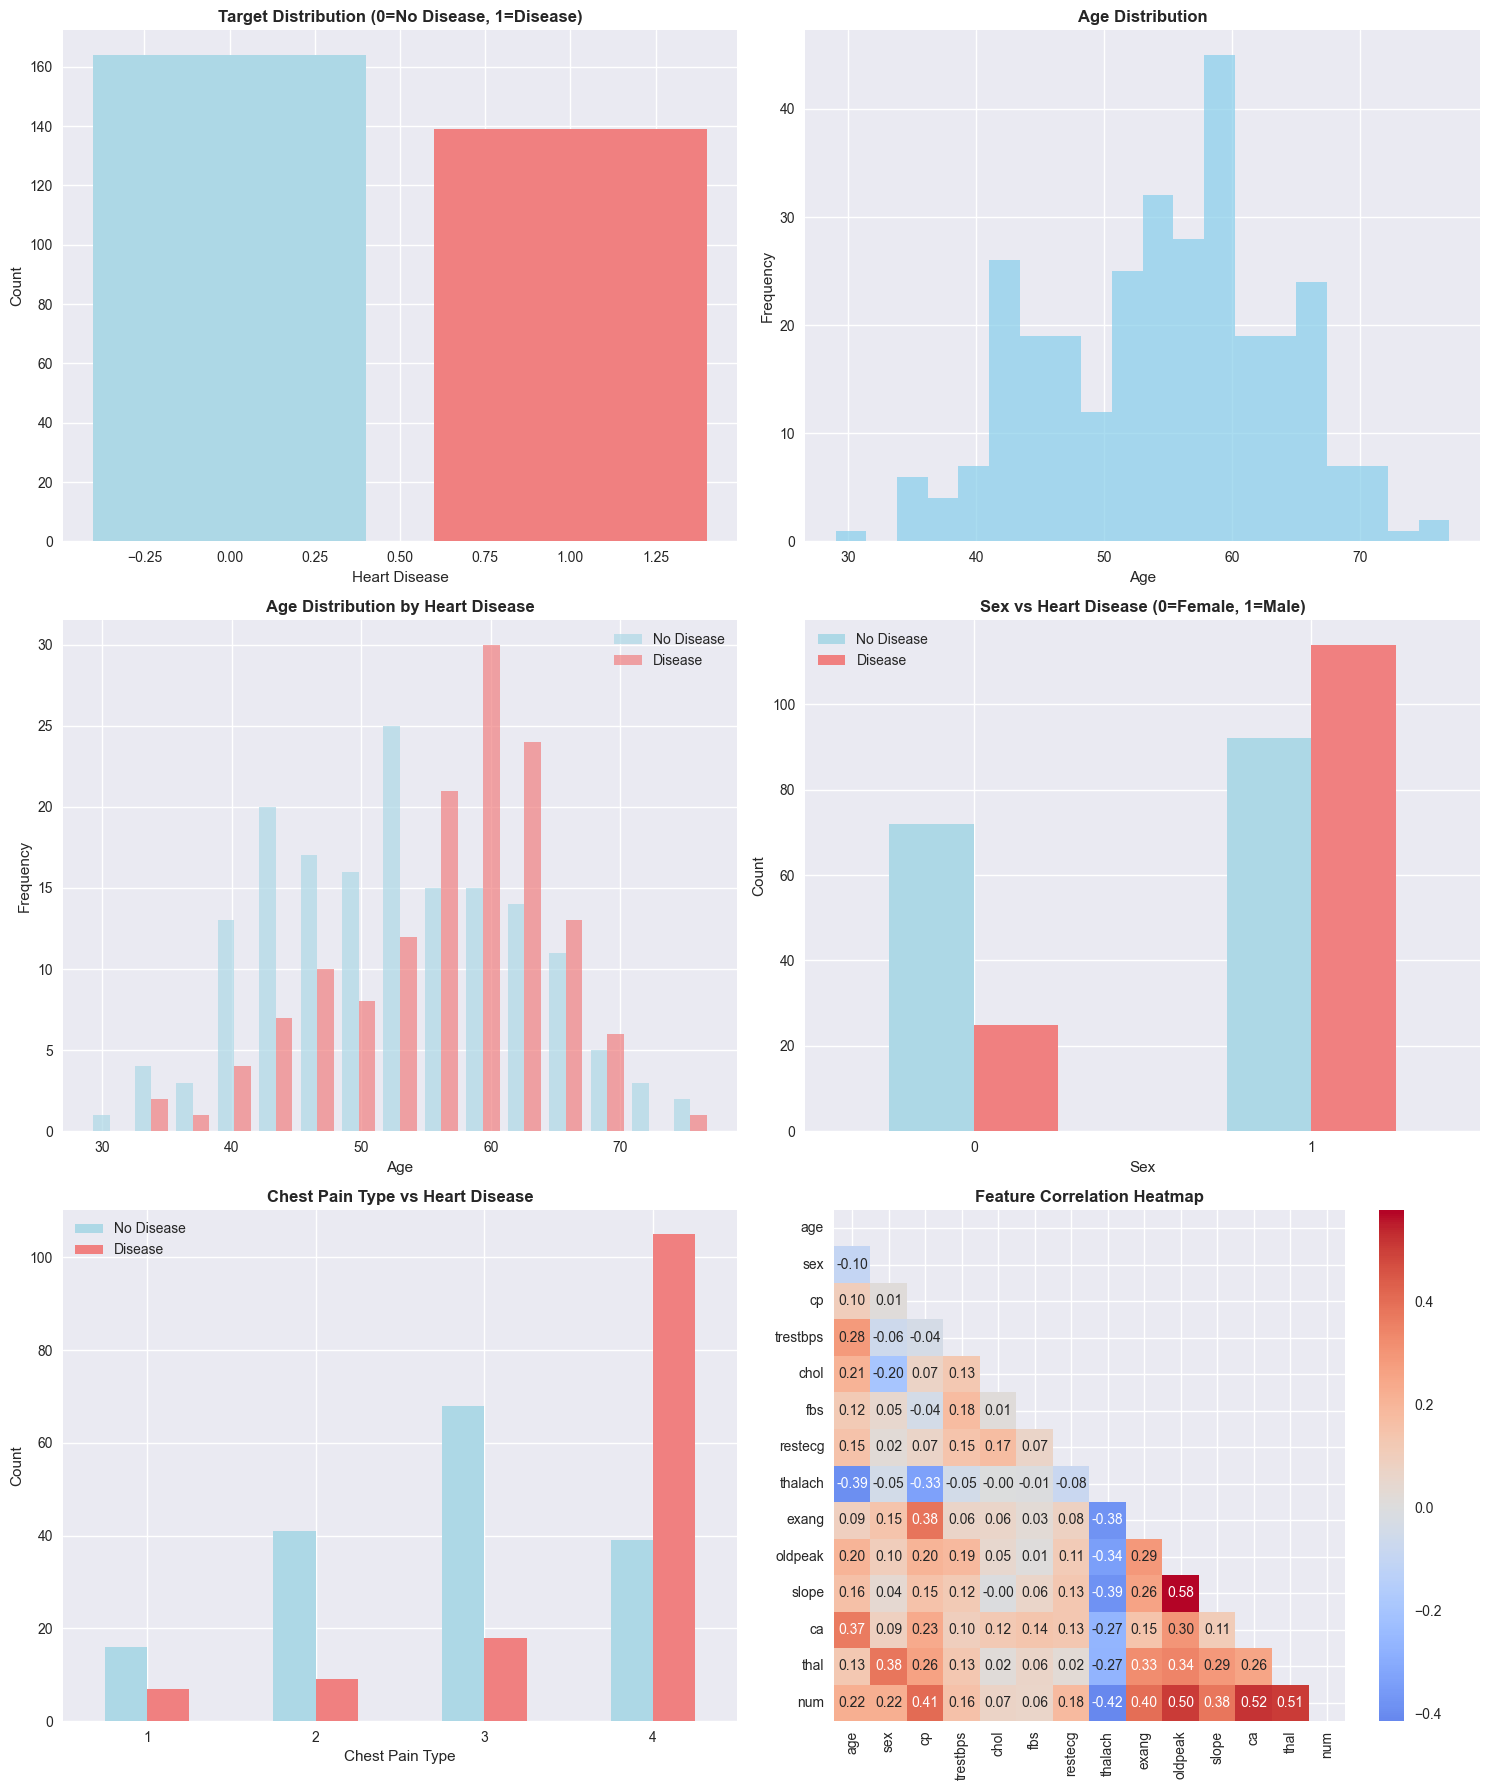

In [17]:
# Visualizations
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# 1. Target distribution
target_counts = y_binary.value_counts()
axes[0,0].bar(target_counts.index, target_counts.values, color=['lightblue', 'lightcoral'])
axes[0,0].set_title('Target Distribution (0=No Disease, 1=Disease)', fontweight='bold')
axes[0,0].set_xlabel('Heart Disease')
axes[0,0].set_ylabel('Count')

# 2. Age distribution
axes[0,1].hist(df_clean['age'], bins=20, color='skyblue', alpha=0.7)
axes[0,1].set_title('Age Distribution', fontweight='bold')
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Frequency')

# 3. Age by target
no_disease_ages = df_clean[y_binary == 0]['age']
disease_ages = df_clean[y_binary == 1]['age']
axes[1,0].hist([no_disease_ages, disease_ages], bins=15, alpha=0.7, 
              label=['No Disease', 'Disease'], color=['lightblue', 'lightcoral'])
axes[1,0].set_title('Age Distribution by Heart Disease', fontweight='bold')
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()

# 4. Sex distribution
sex_counts = pd.crosstab(df_clean['sex'], y_binary)
sex_counts.plot(kind='bar', ax=axes[1,1], color=['lightblue', 'lightcoral'])
axes[1,1].set_title('Sex vs Heart Disease (0=Female, 1=Male)', fontweight='bold')
axes[1,1].set_xlabel('Sex')
axes[1,1].set_ylabel('Count')
axes[1,1].legend(['No Disease', 'Disease'])
axes[1,1].tick_params(axis='x', rotation=0)

# 5. Chest Pain Type
cp_counts = pd.crosstab(df_clean['cp'], y_binary)
cp_counts.plot(kind='bar', ax=axes[2,0], color=['lightblue', 'lightcoral'])
axes[2,0].set_title('Chest Pain Type vs Heart Disease', fontweight='bold')
axes[2,0].set_xlabel('Chest Pain Type')
axes[2,0].set_ylabel('Count')
axes[2,0].legend(['No Disease', 'Disease'])
axes[2,0].tick_params(axis='x', rotation=0)

# 6. Correlation heatmap
numerical_data = df_clean.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
            center=0, square=True, fmt='.2f', ax=axes[2,1])
axes[2,1].set_title('Feature Correlation Heatmap', fontweight='bold')

plt.tight_layout()
plt.show()

# ===============================
# 6. DATA ENCODING
# ===============================

In [18]:
# Separate features and target
X = df_clean.drop(target_col, axis=1)
y = y_binary

# Check for categorical variables that need encoding
categorical_cols = X.select_dtypes(include=[object]).columns.tolist()
print(f" Categorical columns: {categorical_cols}")

if categorical_cols:
    # One-hot encoding for categorical variables
    X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
    print(f" Applied one-hot encoding for {len(categorical_cols)} categorical columns")
else:
    X_encoded = X.copy()
    print("ℹ No categorical variables found - skipping encoding")

print(f" Features after encoding: {X_encoded.shape}")
print(f" Feature names: {list(X_encoded.columns)}")

 Categorical columns: []
ℹ No categorical variables found - skipping encoding
 Features after encoding: (303, 13)
 Feature names: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


# ===============================
# 7. FEATURE SCALING
# ===============================

In [19]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X_encoded)

# Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns, index=X_encoded.index)

print(f" Applied StandardScaler to {X_scaled_df.shape[1]} features")
print(f" Scaled data mean: {X_scaled_df.mean().mean():.6f}")
print(f" Scaled data std: {X_scaled_df.std().mean():.6f}")


 Applied StandardScaler to 13 features
 Scaled data mean: 0.000000
 Scaled data std: 1.001654


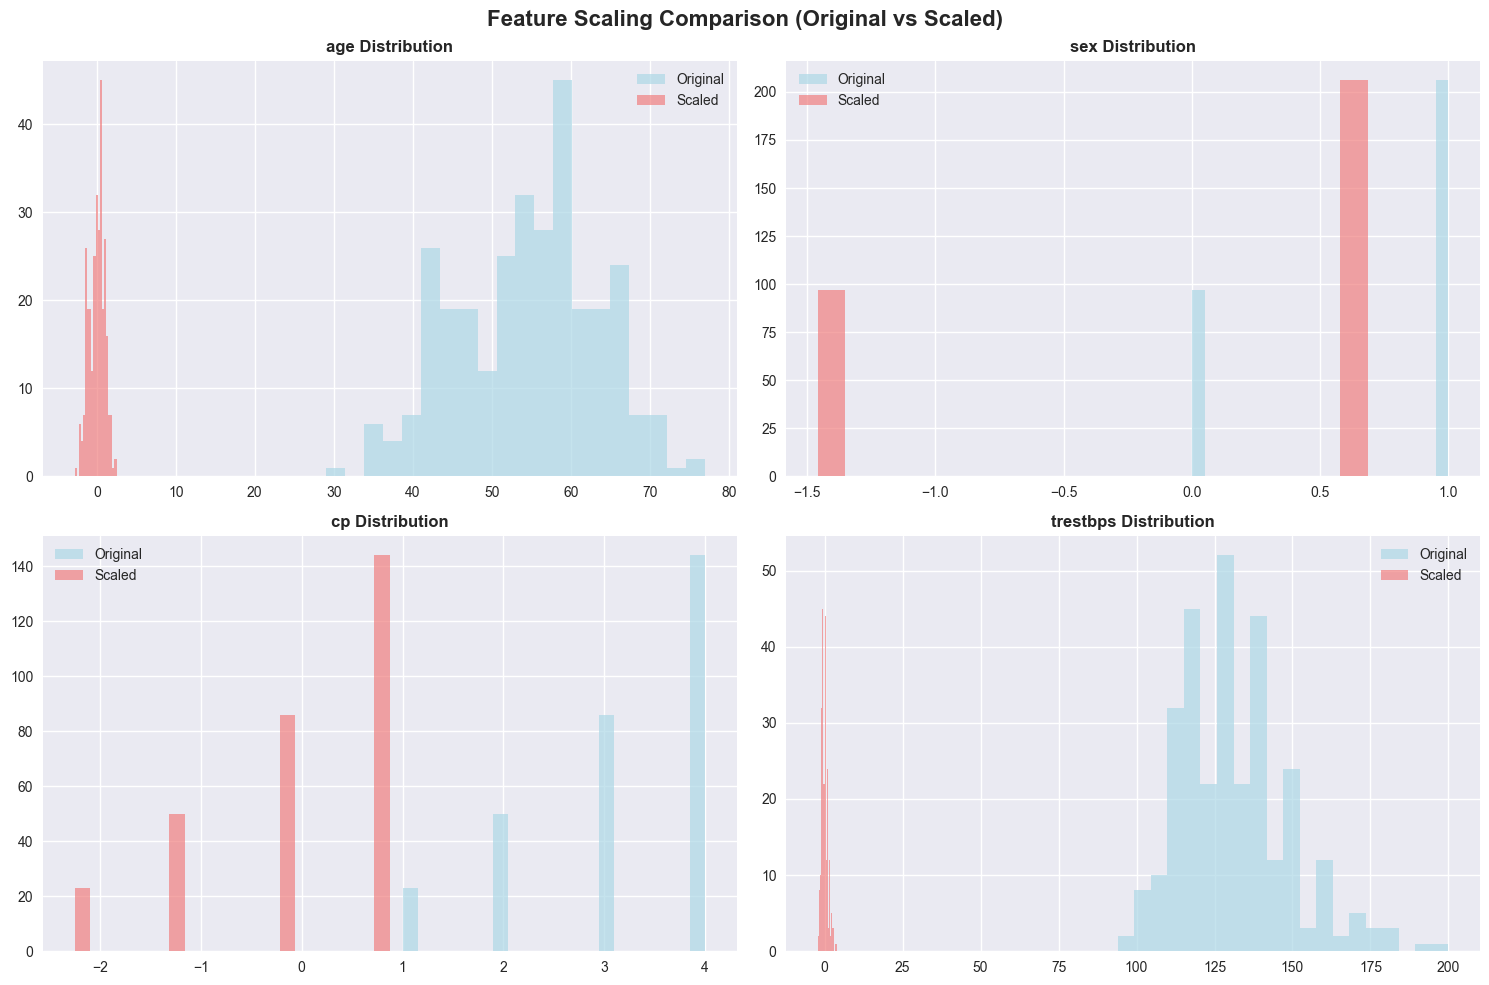

In [20]:
# Visualize scaling effect
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Before scaling - first 4 features
features_to_show = X_encoded.columns[:4]
for i, feature in enumerate(features_to_show):
    row, col = divmod(i, 2)
    axes[row, col].hist(X_encoded[feature], bins=20, alpha=0.7, color='lightblue', label='Original')
    axes[row, col].hist(X_scaled_df[feature], bins=20, alpha=0.7, color='lightcoral', label='Scaled')
    axes[row, col].set_title(f'{feature} Distribution', fontweight='bold')
    axes[row, col].legend()

plt.suptitle('Feature Scaling Comparison (Original vs Scaled)', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

# ===============================
# 8. SAVE PREPROCESSED DATA
# ===============================

In [ ]:
import os

# Save cleaned data
df_clean.to_csv('../Data/heart_disease_cleaned.csv', index=False)
print(" Saved cleaned data to '../Data/heart_disease_cleaned.csv'")

# Save preprocessed features and target
X_scaled_df.to_csv('../Data/X_preprocessed.csv', index=False)
y.to_csv('../Data/y_target.csv', index=False)
print(" Saved preprocessed features to '../Data/X_preprocessed.csv'")
print(" Saved target variable to '../Data/y_target.csv'")

# Save scaler
import joblib
joblib.dump(scaler, '../Models/scaler.pkl')
print(" Saved scaler to '../Models/scaler.pkl'")

# Save preprocessing summary
preprocessing_summary = {
    'original_shape': df.shape,
    'cleaned_shape': df_clean.shape,
    'features_after_encoding': X_encoded.shape,
    'final_features': list(X_scaled_df.columns),
    'target_distribution': y.value_counts().to_dict(),
    'missing_values_handled': missing_values.sum(),
    'duplicates_removed': duplicates
}

with open('../Results/preprocessing_summary.txt', 'w') as f:
    for key, value in preprocessing_summary.items():
        f.write(f"{key}: {value}\n")

with open('../Results/preprocessing_summary.txt', 'w') as f:
    f.write("HEART DISEASE DATASET - PREPROCESSING SUMMARY\n")
    f.write("=" * 50 + "\n")
    for key, value in preprocessing_summary.items():
        f.write(f"{key}: {value}\n")

print(" Saved preprocessing summary to 'results/preprocessing_summary.txt'")

print("\n" + "="*60)
print(" DATA PREPROCESSING COMPLETED!")
print(" Dataset is ready for dimensionality reduction (PCA)")
print(" Files saved in respective directories")
print(" Next: Run Notebook 02 - PCA Analysis")
print("="*60)

 Saved cleaned data to '../Data/heart_disease_cleaned.csv'
 Saved preprocessed features to '../Data/X_preprocessed.csv'
 Saved target variable to '../Data/y_target.csv'
 Saved scaler to '../Models/scaler.pkl'
 Saved preprocessing summary to 'results/preprocessing_summary.txt'

 DATA PREPROCESSING COMPLETED!
 Dataset is ready for dimensionality reduction (PCA)
 Files saved in respective directories
 Next: Run Notebook 02 - PCA Analysis
